# Perkenalan


Nama : Hilal Amirudin

Batch : RMT 019

Objektiv : Membuat model klasifikasi untuk memprediksi default_payment_next_month

# Query SQL untuk dataset credit_card_default

SELECT DISTINCT limit_balance, CAST(sex AS INT) AS sex, CAST(education_level AS INT) AS education_level,
       CAST(marital_status AS INT) AS marital_status, age, pay_0, pay_2, pay_3, pay_4,
       CAST(pay_5 AS FLOAT64) AS pay_5_float, CAST(pay_6 AS FLOAT64) AS pay_6_float,
       bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6,
       pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6,
       CAST(default_payment_next_month AS INT) AS default_payment_next_month

FROM bigquery-public-data.ml_datasets.
credit_card_default

LIMIT 37962

# Import Library

In [339]:
# Import seluruh library yang akan digunakan dalam memprediksi default_payment_next_month

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import json
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, SVR 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,  RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report

# Data Loading

Penjelasan Dasaset CC_default

1. limit_balance = Amount of given credit in NT dollars (includes individual and family/supplementary credit)
---
2. sex = Gender (1=male, 2=female)
---
3. education_level = Education Level (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
---
4. marital_status = Marital status (1=married, 2=single, 3=others)
---
5. Age = Age in years
---
6. pay_0 - pay_6 = Repayment status in September, 2005 (1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
---
7. bill_amt_1 - bill_amt_6 = Amount of bill statement in September - April, 2005 (NT dollar)
---
8. pay_amt_1 - pay_amt_6 = Amount of previous payment in September - april, 2005 (NT dollar)
---
9. default_payment = Default payment (1=yes, 0=no)

## Loading Dataset

In [210]:
# melakukan loading data csv ke notebook

CC_default = pd.read_csv ('/content/drive/MyDrive/DataP1M1/h8dsft_P1M1_Hilal_amirudin.csv')

In [211]:
# menampilkan 10 data teratas

CC_default.head(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000,1,6,1,54,0,0,0,0,0,...,29296,26210,17643,2545,2208,1336,2232,542,348,1
1,200000,1,4,1,49,0,0,0,0,0,...,50146,50235,48984,1689,2164,2500,3480,2500,3000,0
2,20000,2,6,2,22,0,0,0,0,0,...,1434,500,0,4641,1019,900,0,1500,0,1
3,260000,2,4,2,33,0,0,0,0,0,...,27821,30767,29890,5000,5000,1137,5000,1085,5000,0
4,150000,1,4,2,32,0,0,0,-1,0,...,150464,143375,146411,4019,146896,157436,4600,4709,5600,0
5,300000,2,4,2,32,0,0,0,0,0,...,65150,-450,700,15235,1491,1303,0,2000,1400,0
6,130000,1,1,1,45,0,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
7,200000,1,1,1,58,0,0,0,0,0,...,124647,126921,129167,7822,4417,4446,4597,4677,4698,0
8,500000,1,1,1,39,0,0,0,0,0,...,174500,137406,204975,54209,4607,4603,5224,207440,7509,0
9,230000,1,1,1,48,0,0,0,0,0,...,105508,108101,110094,7000,6607,3773,4290,4164,2000,0


In [212]:
# menampilkan 10 data terbawah

CC_default.tail(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2954,360000,2,2,2,26,-1,-1,-1,-1,-2,...,0,0,0,463,2500,0,0,0,0,0
2955,100000,1,3,1,40,0,0,-1,-1,-2,...,0,0,0,2000,2377,40000,0,0,0,0
2956,30000,2,3,1,48,1,-1,-1,-2,-2,...,0,0,0,200,0,0,0,0,0,0
2957,80000,2,3,1,39,-1,-1,-1,-1,-2,...,0,0,5000,5000,5000,0,5000,5000,470,0
2958,20000,1,3,2,26,-1,-1,-1,-2,-2,...,0,0,0,1560,0,0,0,0,0,0
2959,80000,2,3,2,28,-1,-1,-1,-2,-2,...,0,0,0,2800,0,0,0,0,0,0
2960,50000,2,3,1,51,-1,-1,-1,-1,-2,...,0,0,0,300,5880,0,0,0,0,1
2961,450000,2,2,1,38,-2,-2,-2,-2,-2,...,390,390,390,390,780,390,390,390,390,1
2962,50000,2,2,1,44,-2,-2,-2,-2,-2,...,390,390,0,390,390,390,390,0,780,0
2963,290000,2,2,1,39,1,-2,-2,-2,-2,...,3184,390,390,10000,800,3184,390,390,6617,0


In [213]:
# cek tipe datanya

CC_default.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2964 entries, 0 to 2963
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   limit_balance               2964 non-null   int64
 1   sex                         2964 non-null   int64
 2   education_level             2964 non-null   int64
 3   marital_status              2964 non-null   int64
 4   age                         2964 non-null   int64
 5   pay_0                       2964 non-null   int64
 6   pay_2                       2964 non-null   int64
 7   pay_3                       2964 non-null   int64
 8   pay_4                       2964 non-null   int64
 9   pay_5                       2964 non-null   int64
 10  pay_6                       2964 non-null   int64
 11  bill_amt_1                  2964 non-null   int64
 12  bill_amt_2                  2964 non-null   int64
 13  bill_amt_3                  2964 non-null   int64
 14  bill_amt

In [214]:
# melihat kesimpulan data sekilas

CC_default.describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,...,2964.000000,2964.000000,2964.000000,2964.000000,2.964000e+03,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000
mean,163356.950067,1.607625,1.849865,1.560054,35.193657,0.004723,-0.121795,-0.141026,-0.184548,-0.224696,...,44104.558367,40969.898448,39786.491228,6351.044872,6.274611e+03,5152.234818,4562.914980,4914.944332,5384.517544,0.214238
std,125049.701016,0.488362,0.778159,0.522304,9.110949,1.114434,1.180479,1.183337,1.178049,1.158739,...,61912.600106,58276.878626,57308.498646,20888.933729,2.888432e+04,14289.177313,13283.476236,16736.920951,17278.585006,0.410362
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2585.000000,1974.500000,1433.000000,1013.000000,9.975000e+02,479.250000,313.750000,325.250000,175.250000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19895.000000,18819.500000,18511.500000,2238.000000,2.182500e+03,1997.000000,1600.000000,1646.500000,1626.500000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58638.500000,53414.500000,52297.000000,5089.500000,5.000000e+03,4500.000000,4000.250000,4021.000000,4081.750000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,...,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


In [215]:
# mengecek value dari default_payment_next_month

CC_default['default_payment_next_month'].value_counts()

0    2329
1     635
Name: default_payment_next_month, dtype: int64

# EDA (Exploration Data Analysis)

## Statistik Deskriftif

In [216]:
# melihat rata-rata limit balence berdasarkan jenis kelamin

CC_default.groupby(['sex'])[['limit_balance']].mean().round(2)

,limit_balance
sex,
1,158925.19
2,166218.77


Ternyata mayoritas wanita memilki limit_balance yang lebih tinggi dibandingkan pria dengan rata-rata limit balance sebesar $ 166219 

In [217]:
# melihat rata-rata limit balence berdasarkan education_level

CC_default.groupby(['education_level'])[['limit_balance']].mean().round(2)

,limit_balance
education_level,
0,175000.00
1,206030.83
2,144964.29
3,124409.94
4,227692.31
5,155416.67
6,62500.00


Menariknya rata-rata limit_balance tertinggi berada pada level edukasi high scholl atau sekolah menengah sebesar $ 227692

In [218]:
# melihat rata-rata limit balence berdasarkan marital_status

CC_default.groupby(['marital_status'])[['limit_balance']].mean().round(2)

,limit_balance
marital_status,
0,115000.00
1,179519.16
2,151035.13
3,115428.57


rata-rata limit balance tertinggi berada pada jenis hubungan menikah (2)

<function matplotlib.pyplot.show(close=None, block=None)>

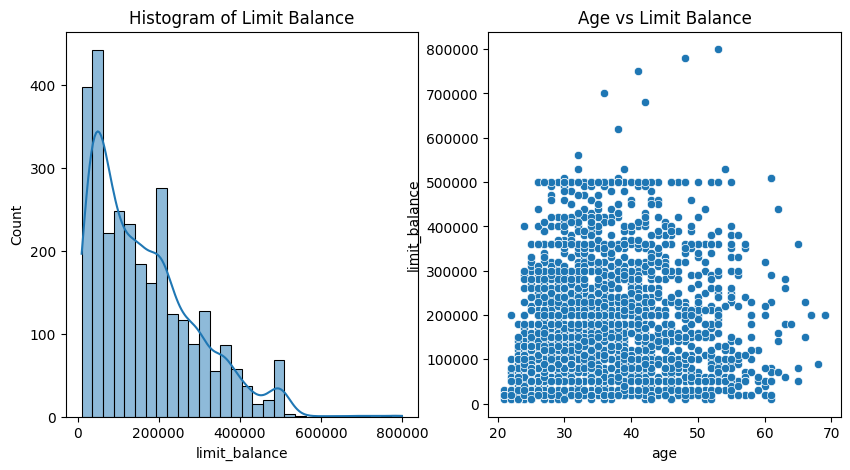

In [219]:
# melihat korelasi limit balence berdasarkan umur

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(CC_default['limit_balance'], kde=True, bins=30)
plt.title('Histogram of Limit Balance')

plt.subplot(1, 2, 2)
sns.scatterplot(x='age',y='limit_balance',data=CC_default)
plt.title('Age vs Limit Balance')
plt.show

1. Histogram Limit Balance: Melalui histogram yang dihasilkan, kita dapat melihat distribusi dari variabel 'limit_balance'. Dalam hal ini, histogram menunjukkan bahwa data limit_balance cenderung miring ke kanan (skewed right) dengan rentang nilai 0-800,000. Ini berarti sebagian besar klien memiliki batas kredit yang relatif rendah, tetapi ada juga beberapa klien dengan batas kredit yang tinggi.

2. Age vs Limit Balance Scatter Plot: Dari scatter plot antara 'age' dan 'limit_balance', kita dapat mengamati hubungan antara usia dan batas kredit. Plot menunjukkan bahwa terdapat kepadatan titik-titik yang tinggi di rentang usia 20-60 tahun. Selain itu, pada rentang limit_balance 0-500,000, terdapat sebaran yang signifikan dari titik-titik data. Hal ini menunjukkan bahwa kisaran usia tersebut memiliki keterkaitan yang kuat dengan batas kredit, dan rentang batas kredit tertentu lebih umum dalam kelompok usia tersebut. selain itu, Rentang usia 20-60 tahun merupakan kelompok yang lebih dominan dalam data ini.

Saya memiliki asumsi bahwa status pernikahan dan tingkat pendidikan akan mempengaruhi kredit status dalam memenuhi kewajiban pembayaran pada bulan berikutnya

In [220]:
# Korelasi antara Education_level, Status Pernikahan, dan default_payment_

pendapatan1 = CC_default[['education_level','marital_status','default_payment_next_month']]

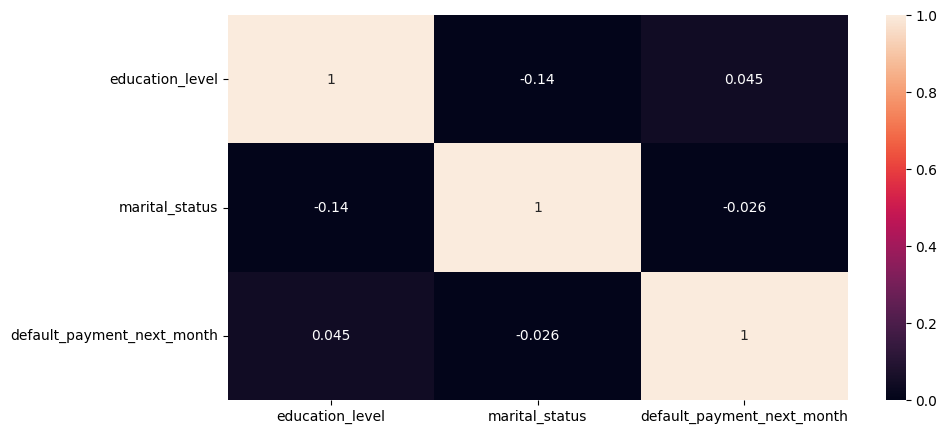

In [221]:
# Mari kita cek korelasi data yang sudah di grouping berdasrkan heatmapnya dengan meilhat variable warna

corr = pendapatan1.corr()

plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot= True, vmin=0, vmax=1)
plt.show()

Dengan demikian, dapat diasumsikan bahwa status pernikahan dan tingkat pendidikan tidak akan akan mempengaruhi kredit status dalam memenuhi kewajiban pembayaran pada bulan berikutnya. Korelasi yang lemah menunjukkan bahwa hubungan antara kedua faktor tersebut tidak signifikan dalam memprediksi default_payment. Oleh karena itu, diperlukan analisis tambahan atau pendekatan lain untuk menguji asumsi tersebut, seperti menggunakan metode statistik atau model prediktif

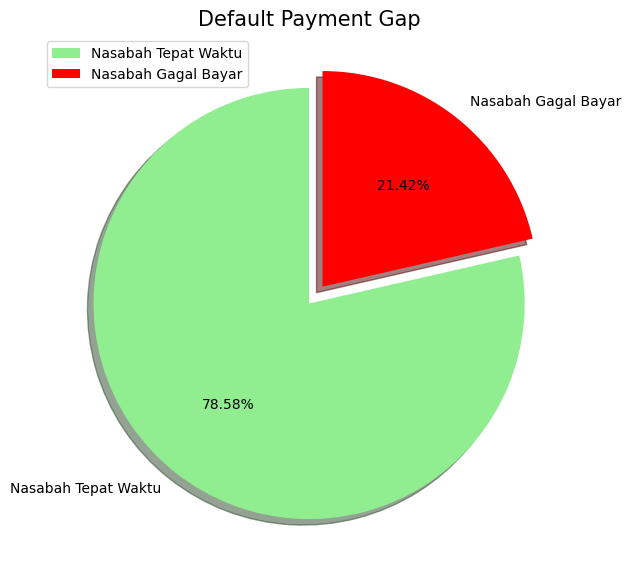

In [222]:
# melihat gap antara nasabah tepat waktu dan gagal bayar

labels= ['Nasabah Tepat Waktu', 'Nasabah Gagal Bayar']
size=CC_default['default_payment_next_month'].value_counts()
colors= ['lightgreen','red']
explode=[0, 0.100]

fig, axes= plt.subplots(figsize=(11,7))
plt.pie(size, colors= colors, explode=explode, labels=labels, shadow=True, startangle= 90, autopct='%.2f%%')
plt.title('Default Payment Gap', fontsize=15)
plt.legend()
plt.show()

In [223]:
# melihat keseluruhan dataset berdasrkan umur atau age

bins= [20, 30, 40, 50, 71]
CC_default['Age Category']= pd.cut(CC_default['age'], bins=bins, labels=['20-30','30-40','40-50','50-71'])
CC_default.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month,Age Category
0,80000,1,6,1,54,0,0,0,0,0,...,26210,17643,2545,2208,1336,2232,542,348,1,50-71
1,200000,1,4,1,49,0,0,0,0,0,...,50235,48984,1689,2164,2500,3480,2500,3000,0,40-50
2,20000,2,6,2,22,0,0,0,0,0,...,500,0,4641,1019,900,0,1500,0,1,20-30
3,260000,2,4,2,33,0,0,0,0,0,...,30767,29890,5000,5000,1137,5000,1085,5000,0,30-40
4,150000,1,4,2,32,0,0,0,-1,0,...,143375,146411,4019,146896,157436,4600,4709,5600,0,30-40


In [224]:
# Menghapus kolom 'Age Category'

CC_default = CC_default.drop('Age Category', axis=1)

## Analisis Missing Value

In [225]:
#persentase missing values
missing_percentage = CC_default.isna().mean() * 100

# Tampilkan hasilnya dengan hanya menampilkan kolom dengan nilai yang lebih besar dari 0
print(missing_percentage[missing_percentage > 0])

Series([], dtype: float64)


Ternyata pada dataset CC_default tidak terdapat missing value

# Feature Engineering

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, transformasi data, dan proses-proses lain yang dibutuhkan.

## Split between X (Features) and y (Target)

In [226]:
# Splitting between `X` and `y`

X = CC_default.drop(['default_payment_next_month'], axis=1)
y = CC_default['default_payment_next_month']

## Split between Train-Set and Test-Set

In [227]:
# melakukan split train dan test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)
X_train

Train Size :  (2371, 23)
Test Size  :  (593, 23)


,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
518,490000,1,2,2,42,0,0,0,0,0,...,477884,488808,427064,436172,16100,20000,19000,16000,16000,15000
2779,170000,2,1,2,27,-2,-2,-2,-2,-2,...,30000,0,0,1532,18719,30000,0,0,1532,0
573,210000,1,2,3,27,0,0,0,0,0,...,84014,84365,86517,87296,3883,4000,3008,3500,3139,3373
2811,260000,2,1,1,30,1,-2,-2,-2,-2,...,0,0,0,36150,0,0,0,0,36150,0
2948,180000,2,2,1,35,-1,-1,-1,-1,-2,...,360,0,0,414,590,360,0,0,414,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,20000,2,3,2,31,-2,-2,-1,0,0,...,18354,19064,19422,4390,20,21431,2300,558,4403,0
1095,160000,2,2,1,42,-1,0,0,0,0,...,36512,36382,37105,38034,1569,1895,1606,1329,1528,1600
1130,150000,1,3,2,44,0,0,0,0,0,...,34409,93241,67549,62479,5011,3045,70092,2521,3000,3000
1294,100000,1,3,2,36,2,0,0,0,0,...,42636,44728,49192,51391,4400,1028,3120,6218,4016,4536


In [228]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Num Columns : ', num_columns)
print('Cat Columns : ', cat_columns)

Num Columns :  ['limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
Cat Columns :  []


In [229]:
# Split Train-Set and Test-Set based on Column Types

X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

X_train_num

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
518,490000,1,2,2,42,0,0,0,0,0,...,477884,488808,427064,436172,16100,20000,19000,16000,16000,15000
2779,170000,2,1,2,27,-2,-2,-2,-2,-2,...,30000,0,0,1532,18719,30000,0,0,1532,0
573,210000,1,2,3,27,0,0,0,0,0,...,84014,84365,86517,87296,3883,4000,3008,3500,3139,3373
2811,260000,2,1,1,30,1,-2,-2,-2,-2,...,0,0,0,36150,0,0,0,0,36150,0
2948,180000,2,2,1,35,-1,-1,-1,-1,-2,...,360,0,0,414,590,360,0,0,414,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,20000,2,3,2,31,-2,-2,-1,0,0,...,18354,19064,19422,4390,20,21431,2300,558,4403,0
1095,160000,2,2,1,42,-1,0,0,0,0,...,36512,36382,37105,38034,1569,1895,1606,1329,1528,1600
1130,150000,1,3,2,44,0,0,0,0,0,...,34409,93241,67549,62479,5011,3045,70092,2521,3000,3000
1294,100000,1,3,2,36,2,0,0,0,0,...,42636,44728,49192,51391,4400,1028,3120,6218,4016,4536


## Handling Outlier

In [230]:
# kita cek outliernya pada dataset asli dengan metode skew

CC_default.skew()

limit_balance                  1.000605
sex                           -0.441056
education_level                0.899600
marital_status                -0.020784
age                            0.772632
pay_0                          0.927672
pay_2                          0.862469
pay_3                          0.932184
pay_4                          1.102317
pay_5                          1.060916
pay_6                          0.979319
bill_amt_1                     2.484229
bill_amt_2                     2.457971
bill_amt_3                     2.569559
bill_amt_4                     2.447792
bill_amt_5                     2.399944
bill_amt_6                     2.432000
pay_amt_1                     11.875903
pay_amt_2                     29.399792
pay_amt_3                      8.043463
pay_amt_4                      8.450288
pay_amt_5                     11.467169
pay_amt_6                      9.758714
default_payment_next_month     1.393676
dtype: float64

In [231]:
# kita cek juga data oultlier pada y_test dengan metode skew

y_test.skew()

1.681157032297117

In [232]:
# kita buat rumus untuk menggambarkan persebaran data dan outlier dalam bentuk histogram dan boxplot

def diagnostic_plots(CC_default, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(CC_default[variable], bins=20)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=CC_default[variable])
    plt.title('Boxplot')

    plt.show()

mari kita lakukan pengecekan pada data berjenis pembayaran yang memiliki nilai outlier ekstrim stelah dicek melalui skewness. terutama pada data pay_amt 1-6

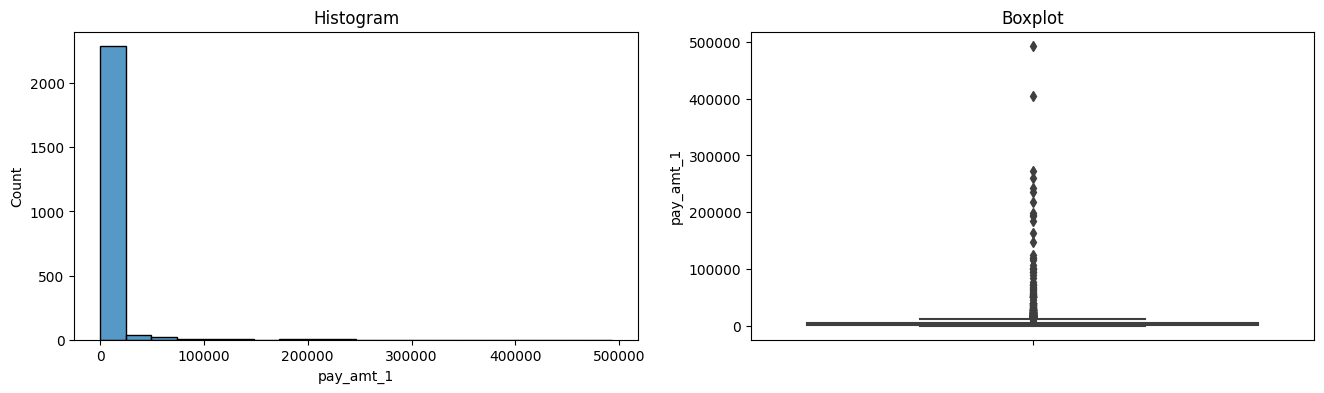


Skewness Value :  12.068073124991976


In [233]:
# cek outlier pada pay_amt_1

diagnostic_plots(X_train, 'pay_amt_1')
print('\nSkewness Value : ', X_train['pay_amt_1'].skew())

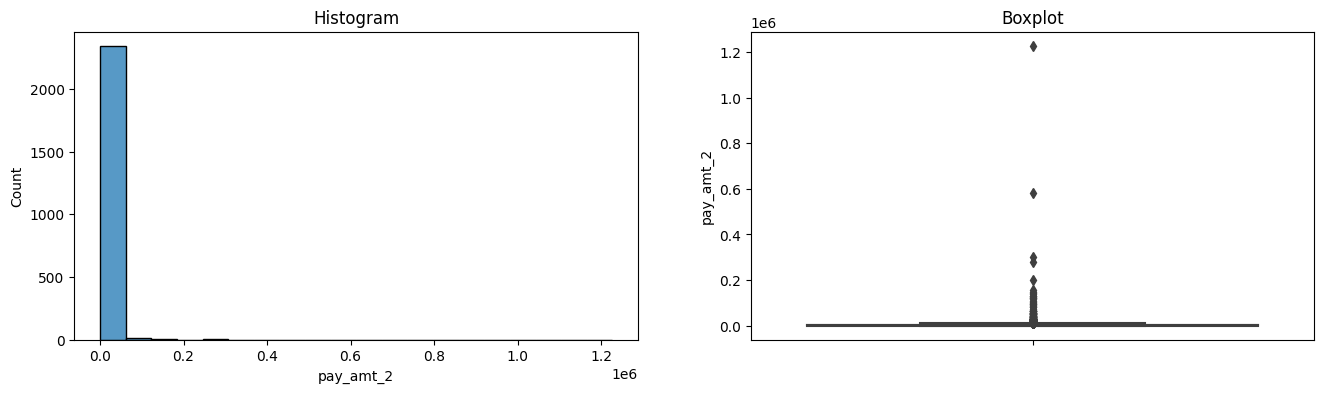


Skewness Value :  27.55346912619999


In [234]:
# cek outlier pada pay_amt_2

diagnostic_plots(X_train, 'pay_amt_2')
print('\nSkewness Value : ', X_train['pay_amt_2'].skew())

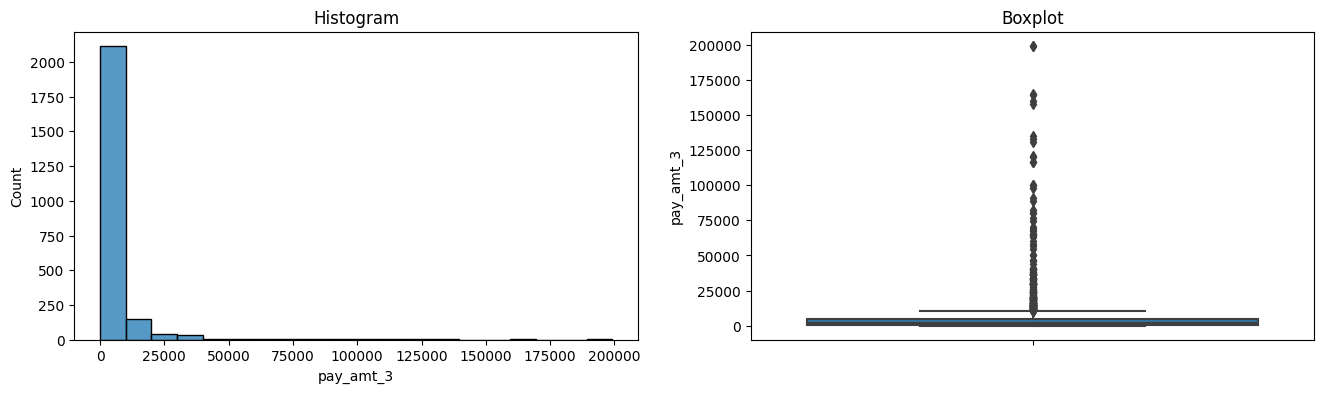


Skewness Value :  7.7338103140881795


In [235]:
# cek outlier pada pay_amt_3

diagnostic_plots(X_train, 'pay_amt_3')
print('\nSkewness Value : ', X_train['pay_amt_3'].skew())

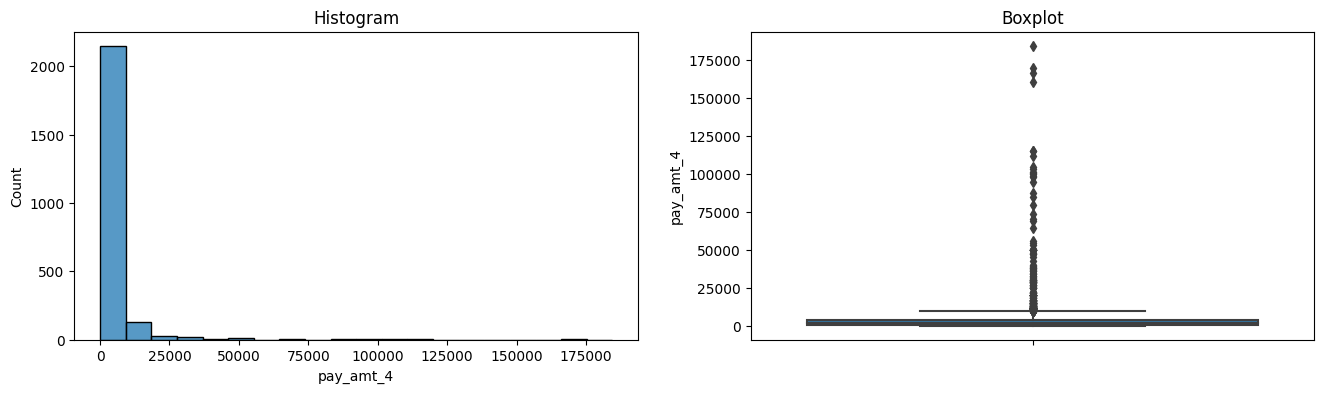


Skewness Value :  8.013836060151847


In [236]:
# cek outlier pada pay_amt_4

diagnostic_plots(X_train, 'pay_amt_4')
print('\nSkewness Value : ', X_train['pay_amt_4'].skew())

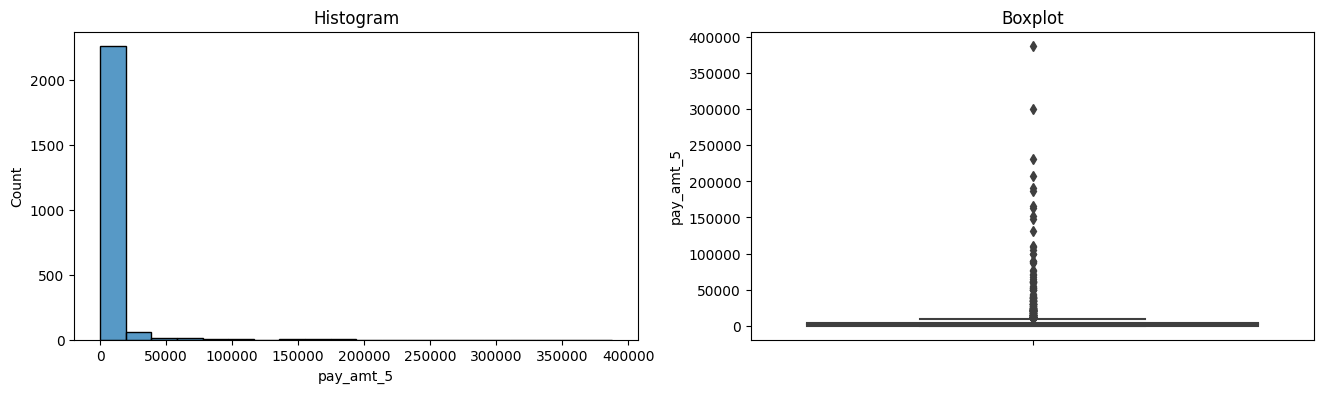


Skewness Value :  27.55346912619999


In [237]:
# cek outlier pada pay_amt_5

diagnostic_plots(X_train, 'pay_amt_5')
print('\nSkewness Value : ', X_train['pay_amt_2'].skew())

In [238]:
# marikita hitung batas atas dan batas nawah melalui metode Z-Score

def find_normal_boundaries(CC_default, var):
    upper_boundary = CC_default[var].mean() + 3 * CC_default[var].std()
    lower_boundary = CC_default[var].mean() - 3 * CC_default[var].std()

    return upper_boundary, lower_boundary

In [239]:
upper_boundary, lower_boundary = find_normal_boundaries(X_train, 'pay_amt_5')
upper_boundary, lower_boundary

(57411.33156766246, -47181.20756934951)

In [240]:
# marikita hitung batas atas dan batas nawah melalui metode IQR turkey


def percentage_outlier(CC_default, var):
  
  outlier_right_tail=(len(CC_default[CC_default[var] > upper_boundary]) / len(CC_default) * 100)
  outlier_left_tail= (len(CC_default[CC_default[var] < lower_boundary]) / len(CC_default) * 100)
  return outlier_right_tail, outlier_left_tail

In [241]:
print(f"% right end outliers : {percentage_outlier(X_train,'pay_amt_5')[0]}")
print(f"% left end outliers  : {percentage_outlier(X_train,'pay_amt_5')[1]}")

% right end outliers : 1.3496415014761705
% left end outliers  : 0.0


In [242]:
# identifikasi indeks (index) dari baris data yang termasuk sebagai outlier

index_outlier= X_train.query('pay_amt_5 > @upper_boundary').index.tolist()
index_outlier

[2686,
 2712,
 986,
 2616,
 2157,
 8,
 591,
 71,
 2338,
 988,
 2242,
 334,
 338,
 743,
 2622,
 2247,
 2619,
 1107,
 2089,
 984,
 2226,
 1545,
 2780,
 333,
 2026,
 364,
 2145,
 2388,
 2455,
 980,
 1648,
 2068]

In [243]:
# mengakses subset data

y_train.loc[index_outlier]

2686    0
2712    0
986     0
2616    0
2157    0
8       0
591     0
71      0
2338    0
988     0
2242    0
334     0
338     1
743     0
2622    1
2247    0
2619    0
1107    0
2089    0
984     0
2226    0
1545    0
2780    0
333     0
2026    0
364     0
2145    0
2388    0
2455    0
980     0
1648    0
2068    0
Name: default_payment_next_month, dtype: int64

In [244]:
def remove_outliers(y_test, threshold=3):

    mean = np.mean(y_test)
    std = np.std(y_test)
    lower_bound = mean - threshold * std
    upper_bound = mean + threshold * std
    
    return y_test[(y_test > lower_bound) & (y_test < upper_bound)]

In [245]:
# Menghapus outlier dari y_test

y_test_drop = remove_outliers(y_test)

seleksi hanya data tanpa outlier

In [246]:
X_train_no_outlier = X_train[
    ~((X_train['pay_amt_5'] > upper_boundary) | (X_train['pay_amt_5'] < lower_boundary))]

In [247]:
X_train.shape[0] #dengan outlier

2371

In [248]:
X_train_no_outlier.shape[0] #tanpa outlier

2339

In [249]:
X_test.shape

(593, 23)

In [250]:
#sesuaikan dengan y_train agar jumlah rownya sama

y_train_drop = y_train.drop(index_outlier, axis=0)
y_train_drop.shape

(2339,)

In [251]:
y_test_drop.shape

(593,)

## Feature Scalling

In [252]:
X_train.describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
count,2371.000000,2371.000000,2371.000000,2371.000000,2371.000000,2371.000000,2371.000000,2371.000000,2371.000000,2371.000000,...,2371.000000,2371.000000,2371.000000,2371.000000,2371.000000,2.371000e+03,2371.000000,2371.000000,2371.000000,2371.000000
mean,163171.657528,1.611556,1.864192,1.553775,35.204555,0.006326,-0.119359,-0.146774,-0.180936,-0.208773,...,47762.262758,43926.848165,40792.622522,39471.610713,6355.124420,6.444854e+03,5171.148461,4437.487980,5115.061999,5438.278364
std,125204.556905,0.487499,0.783875,0.521234,9.138821,1.110537,1.174127,1.182310,1.189862,1.179941,...,68200.728329,62344.465829,58794.559857,57612.207111,21835.609866,3.176816e+04,14107.439371,12200.155757,17432.089856,17428.791054
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-25443.000000,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,3246.500000,2577.500000,1898.000000,1409.500000,1004.000000,9.400000e+02,497.000000,226.000000,302.000000,95.500000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,20846.000000,19717.000000,18811.000000,18320.000000,2200.000000,2.174000e+03,2000.000000,1589.000000,1700.000000,1668.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,61398.000000,57920.000000,53153.500000,51846.500000,5029.000000,5.000000e+03,4501.000000,4000.000000,4181.500000,4000.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,...,578971.000000,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,184483.000000,388071.000000,403500.000000


Nilai mean lebih besar dari standar deviasi dalam X_train.describe(), itu menunjukkan bahwa skala variabel dalam fitur (fitur/atribut dari dataset) mungkin berbeda secara signifikan. Hal ini menunjukkan adanya ketimpangan atau variasi besar dalam rentang nilai atribut yang berbeda. maka kita akan menggunakan MinMaxScaller dalam melakukan scalling

In [253]:
# Scalling menggunakan MinMaxScaller

scaler = MinMaxScaler()
scaler.fit(X_train_no_outlier)

X_train_num_scaled = scaler.transform(X_train_no_outlier)
X_test_num_scaled = scaler.transform(X_test_num)


## Finalisasi data

In [254]:
# Concate Columns

X_train_final = np.concatenate([X_train_num_scaled], axis=1)
X_test_final = np.concatenate([X_test_num_scaled], axis=1)
X_train_final

array([[0.60759494, 0.        , 0.33333333, ..., 0.09409606, 0.29415009,
        0.03717472],
       [0.20253165, 1.        , 0.16666667, ..., 0.        , 0.02816487,
        0.        ],
       [0.25316456, 0.        , 0.33333333, ..., 0.02058351, 0.05770857,
        0.00835936],
       ...,
       [0.17721519, 0.        , 0.5       , ..., 0.01482601, 0.05515314,
        0.00743494],
       [0.11392405, 0.        , 0.5       , ..., 0.03656808, 0.07383167,
        0.01124164],
       [0.43037975, 1.        , 0.33333333, ..., 0.01764301, 0.11030628,
        0.01239157]])

In [255]:
# Membuat DataFrame dari `X_train_final`

model_final = pd.DataFrame(X_train_final, columns=[num_columns + cat_columns])
model_final

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,0.607595,0.0,0.333333,0.666667,0.437500,0.2,0.222222,0.222222,0.2,0.222222,...,0.832752,1.000000,0.969470,1.000000,0.032634,0.016299,0.095377,0.094096,0.294150,0.037175
1,0.202532,1.0,0.166667,0.666667,0.125000,0.0,0.000000,0.000000,0.0,0.000000,...,0.091730,0.087082,0.095428,0.147877,0.037942,0.024448,0.000000,0.000000,0.028165,0.000000
2,0.253165,0.0,0.333333,1.000000,0.125000,0.2,0.222222,0.222222,0.2,0.222222,...,0.181096,0.244646,0.272497,0.316019,0.007871,0.003260,0.015100,0.020584,0.057709,0.008359
3,0.316456,1.0,0.166667,0.333333,0.187500,0.3,0.000000,0.000000,0.0,0.000000,...,0.042095,0.087082,0.095428,0.215746,0.000000,0.000000,0.000000,0.000000,0.664595,0.000000
4,0.215190,1.0,0.333333,0.333333,0.291667,0.1,0.111111,0.111111,0.1,0.000000,...,0.042691,0.087082,0.095428,0.145685,0.001196,0.000293,0.000000,0.000000,0.007611,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,0.012658,1.0,0.500000,0.666667,0.208333,0.0,0.000000,0.111111,0.2,0.222222,...,0.072462,0.122687,0.135178,0.153480,0.000041,0.017465,0.011546,0.003282,0.080946,0.000000
2335,0.189873,1.0,0.333333,0.333333,0.437500,0.1,0.222222,0.222222,0.2,0.222222,...,0.102504,0.155031,0.171368,0.219440,0.003180,0.001544,0.008062,0.007816,0.028091,0.003965
2336,0.177215,0.0,0.500000,0.666667,0.479167,0.2,0.222222,0.222222,0.2,0.222222,...,0.099025,0.261223,0.233676,0.267365,0.010157,0.002481,0.351852,0.014826,0.055153,0.007435
2337,0.113924,0.0,0.500000,0.666667,0.312500,0.4,0.222222,0.222222,0.2,0.222222,...,0.112636,0.170618,0.196106,0.245627,0.008918,0.000838,0.015662,0.036568,0.073832,0.011242


In [256]:
list(model_final.keys())

[('limit_balance',),
 ('sex',),
 ('education_level',),
 ('marital_status',),
 ('age',),
 ('pay_0',),
 ('pay_2',),
 ('pay_3',),
 ('pay_4',),
 ('pay_5',),
 ('pay_6',),
 ('bill_amt_1',),
 ('bill_amt_2',),
 ('bill_amt_3',),
 ('bill_amt_4',),
 ('bill_amt_5',),
 ('bill_amt_6',),
 ('pay_amt_1',),
 ('pay_amt_2',),
 ('pay_amt_3',),
 ('pay_amt_4',),
 ('pay_amt_5',),
 ('pay_amt_6',)]

Mari kita cocokan antara semua data test dan data uji yang sudah dihilangkan outliernya dan dilakukan scalling berdasarkan kolom dan rowsnya

In [257]:
X_train_final.shape

(2339, 23)

In [258]:
total_jumlah_nan = np.isnan(X_train_final).sum()
total_jumlah_nan

0

In [259]:
X_test_final.shape

(593, 23)

In [260]:
total_jumlah_nan1 = np.isnan(X_test_final).sum()
total_jumlah_nan1

0

In [261]:
y_train_drop.shape

(2339,)

In [262]:
total_jumlah_nan2 = np.isnan(y_train_drop).sum()
total_jumlah_nan2

0

In [263]:
y_test_drop.shape

(593,)

In [264]:
total_jumlah_nan3 = np.isnan(y_test_drop).sum()
total_jumlah_nan2

0

# Model Definition

Bagian ini berisi cell untuk mendefinisikan model.

## Logistic Regression

In [265]:
# Inisialisasi dan latih model Logistic Regression

log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X_train_final, y_train_drop)

LogisticRegression(random_state=42)

## SVM

Karena dataset aslinya memiliki pola non-linear yang kompleks dan tidak dapat dipisahkan secara linear antar masing masing kolom maka kita akan menggunakan Kernel RBF sebagai model definition dariSuport Vector Machine (SVM)

In [266]:
#RBF KERNEL

svc_rbf = SVC(kernel='rbf', gamma="auto", C=1.2)

## Decision Tree

In [289]:
dtr = DecisionTreeClassifier(criterion='gini', random_state=42)

### Decision Tree Classifier

In [268]:
DT_model = DecisionTreeClassifier(criterion='gini')
DT_model.fit(X_train_final, y_train_drop)

DecisionTreeClassifier()

In [269]:
columns=np.array(model_final.columns)

In [270]:
enc_name=pd.get_dummies(model_final, columns = columns)
enc_name_columns=np.array(enc_name.columns)

## Random Forest

In [271]:
# Definisi model Random Forest

rf_model = RandomForestClassifier()

In [272]:
# Voting Classifier

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('linreg', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

## KNN

In [333]:
##Deklarasi model

knn = KNeighborsClassifier(n_neighbors = 3)

## Naive Bayes

In [274]:
#Deklarasi model

nb = GaussianNB()

## Bagging

In [275]:
bag_clf = BaggingClassifier(
    LogisticRegression(), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)

# Model Training

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan

## Logistic Regression

In [276]:
# Lakukan prediksi terhadap data uji

y_pred = log_reg.predict(X_test_final)

## SVM

In [277]:
# Membuat prediksi

svc_rbf.fit(X_train_final, y_train_drop)

SVC(C=1.2, gamma='auto')

### Tuning SVM

In [278]:
#Create a dictionary and fill out some parameters for kernels, C and gamma
grid_parameters = {'C': [0.1, 1.0], 'gamma': ['auto','scale'], 'kernel': ['poly','linear','rbf']}
# verbose = 1 akan tampilkan fitting dan param, verbose=2 lebih komplit lagi,verbose 3 ada score accuracy tiap cv
# return_train_score =True agar bisa di cetak hasil score Train dan rata2 scorenya train, 
# kalau False dia hanya score testnya saja
grid = GridSearchCV(SVC(),grid_parameters,verbose=3, refit=True,scoring ='accuracy', 
                    cv = 5, return_train_score=True, n_jobs=-1
                    ) #multi class tidak support roc_auc
grid.fit(X_train_final,y_train_drop)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1.0], 'gamma': ['auto', 'scale'],
                         'kernel': ['poly', 'linear', 'rbf']},
             return_train_score=True, scoring='accuracy', verbose=3)

In [279]:
print(grid.best_estimator_)
print(grid.best_params_)
print(grid.best_index_)

SVC(kernel='poly')
{'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
9


In [280]:
dt_hyperparam_df = pd.DataFrame(grid.cv_results_)
dt_hyperparam_df.sort_values("mean_test_score", ascending=False)\
[["params", "mean_test_score", "mean_train_score", "std_test_score", "std_train_score",'rank_test_score','mean_score_time']]

,params,mean_test_score,mean_train_score,std_test_score,std_train_score,rank_test_score,mean_score_time
9,"{'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}",0.828124,0.840102,0.016784,0.004867,1,0.043229
7,"{'C': 1.0, 'gamma': 'auto', 'kernel': 'linear'}",0.823420,0.825352,0.012995,0.006233,2,0.029702
10,"{'C': 1.0, 'gamma': 'scale', 'kernel': 'linear'}",0.823420,0.825352,0.012995,0.006233,2,0.057624
11,"{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}",0.822996,0.828665,0.012117,0.005489,4,0.106123
3,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}",0.820433,0.823749,0.009891,0.004568,5,0.029768
5,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}",0.790085,0.797349,0.006966,0.008305,6,0.061546
8,"{'C': 1.0, 'gamma': 'auto', 'kernel': 'rbf'}",0.777684,0.777576,0.001813,0.000774,7,0.056727
1,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}",0.776829,0.778324,0.002054,0.001997,8,0.030832
4,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}",0.776829,0.778324,0.002054,0.001997,8,0.032992
0,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}",0.774690,0.774690,0.000984,0.000246,10,0.031047


In [281]:
#best_svc= grid.best_estimator_
#best_svc= grid
best_svc= SVC(C=1, gamma='auto', kernel='linear').fit(X_train_final,y_train_drop)

print(best_svc)

SVC(C=1, gamma='auto', kernel='linear')


## Decision Tree

In [290]:
# Melatih model menggunakan data pelatihan

dtr.fit(X_train_final ,y_train_drop)

DecisionTreeClassifier(random_state=42)

In [292]:
y_pred_train = dtr.predict(X_train_final)
y_pred_test = dtr.predict(X_test_final)

### Decision Tree Classifier

In [293]:
DT_model= DT_model.fit(model_final ,y_train_drop)

## Random Forest

In [294]:
# Melatih model menggunakan data pelatihan

rf_model.fit(X_train_final, y_train_drop)

RandomForestClassifier()

Evaluasi hasil Voting classifier

In [295]:
voting_clf=voting_clf.fit(X_train_final, y_train_drop)

In [296]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train_final, y_train_drop)
    y_pred = clf.predict(X_test_final)
    print(clf.__class__.__name__, accuracy_score(y_test_drop, y_pred))

LogisticRegression 0.8381112984822934
RandomForestClassifier 0.8347386172006745
SVC 0.8263069139966274
VotingClassifier 0.8347386172006745


## KNN

In [334]:
# Model Latih

knn.fit(X_train_final, y_train_drop)

KNeighborsClassifier(n_neighbors=3)

### Tuning KNN

In [298]:
# Mencari nilai optimal untuk parameter n_neighbors 

k_values = [i for i in range (1,26)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train_final, y_train_drop, cv=10)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

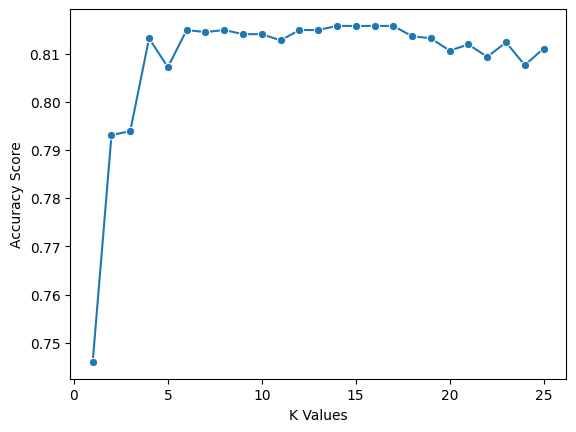

In [299]:
# Kita gambarkan dalam bentuk plot

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

## Naive Bayes

In [300]:
# Melatih model menggunakan data training

nb.fit(X_train_final, y_train_drop)

GaussianNB()

## Bagging

In [301]:
bag_clf.fit(X_train_final, y_train_drop)
y_pred = bag_clf.predict(X_test_final)

# Model Evaluation

## Logistic Regression

In [302]:
# Evaluasi performa model
accuracy = accuracy_score(y_test_drop, y_pred)
precision = precision_score(y_test_drop, y_pred)
recall = recall_score(y_test_drop, y_pred)
f1 = f1_score(y_test_drop, y_pred)
confusion_mat = confusion_matrix(y_test_drop, y_pred)

# Tampilkan hasil evaluasi
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.821247892074199
Precision: 0.5
Recall: 0.018867924528301886
F1-score: 0.03636363636363636
Confusion Matrix:
[[485   2]
 [104   2]]


Dapat disimpulkan bahwa model Logistic Regression memiliki akurasi yang relatif tinggi, namun memiliki keseimbangan yang kurang baik antara precision dan recall untuk kelas 1. Hal ini menunjukkan bahwa model mungkin memiliki kecenderungan untuk memberikan lebih banyak prediksi pada kelas nasabah tepat waktu (kelas 0) dan kurang memperhatikan kelas nasabah gagal bayar (kelas 1).

## SVM

In [303]:
# Evalusi model kernel rbf

y_pred_rbf = svc_rbf.predict(X_test_final)
print("Evaluation: rbf kernel")
print('Training score: {:.4f}'.format(svc_rbf.score(X_train_final, y_train_drop)))
print('Test score: {:.4f}'.format(svc_rbf.score(X_test_final, y_test_drop)))

print(classification_report(y_test,y_pred_rbf))

Evaluation: rbf kernel
Training score: 0.7790
Test score: 0.8212
              precision    recall  f1-score   support

           0       0.82      0.99      0.90       487
           1       0.50      0.03      0.05       106

    accuracy                           0.82       593
   macro avg       0.66      0.51      0.48       593
weighted avg       0.77      0.82      0.75       593



Dalam keseluruhan, model SVM dengan rbf kernel memiliki performa yang baik dalam mengklasifikasikan kelas nasabah tepat waktu (kelas 0) dengan akurasi yang tinggi, tetapi memiliki kinerja yang rendah dalam mengklasifikasikan kelas nasabah gagal bayar (kelas 1) dengan recall dan f1-score yang rendah.

In [304]:
# Menampilkan hasil tuning

print("Best Score:", grid.best_score_)
print("Best Parameters:", grid.best_params_)

Best Score: 0.8281236845476675
Best Parameters: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}


In [305]:
svc_train_p = best_svc.predict(X_train_final)
svc_test_p = best_svc.predict(X_test_final)

print("Evaluation: rbf kernel")
print('Training score: {:.4f}'.format(best_svc.score(X_train_final, y_train_drop)))
print('Test score: {:.4f}'.format(best_svc.score(X_test_final, y_test_drop)))

print(classification_report(y_test,svc_test_p))

Evaluation: rbf kernel
Training score: 0.8281
Test score: 0.8280
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       487
           1       0.52      0.41      0.46       106

    accuracy                           0.83       593
   macro avg       0.70      0.66      0.68       593
weighted avg       0.81      0.83      0.82       593



In [306]:
pd.DataFrame({
    "Actual": y_test,
    "Prediction": svc_test_p
}).T

,2495,1313,767,1461,2834,2494,1322,809,2508,332,...,2605,2905,2893,1237,1543,509,927,2345,1064,2609
Actual,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Prediction,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [307]:
# Melakukan cross-validation dan mengambil hasil performansi
scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results1 = cross_validate(best_svc, X_train_final, y_train_drop, cv=5, scoring=scoring, return_train_score=False)

# Mencetak hasil performansi
for metric in scoring:
    print(f"{metric}:")
    print("Mean:", cv_results1[f'test_{metric}'].mean())
    print("Std:", cv_results1[f'test_{metric}'].std())
    print()

accuracy:
Mean: 0.8234200845549882
Std: 0.0129950613568769

precision:
Mean: 0.7105912518853696
Std: 0.08581038254058414

recall:
Mean: 0.3852650494159928
Std: 0.03336845455421768

f1:
Mean: 0.4954727500822341
Std: 0.02216478427015654



 Evaluasi model SVM ini memberikan wawasan bahwa model memiliki kinerja yang lebih baik dalam mengklasifikasikan sampel ke dalam kelas nasabah tepat waktu (kelas 0) dari pada kelas nasabah gagal bayar (kelas 1).

## Decision Tree

In [308]:
np.mean(y_train_drop)

0.22530996152201796

In [309]:
np.mean(y_test_drop)

0.178752107925801

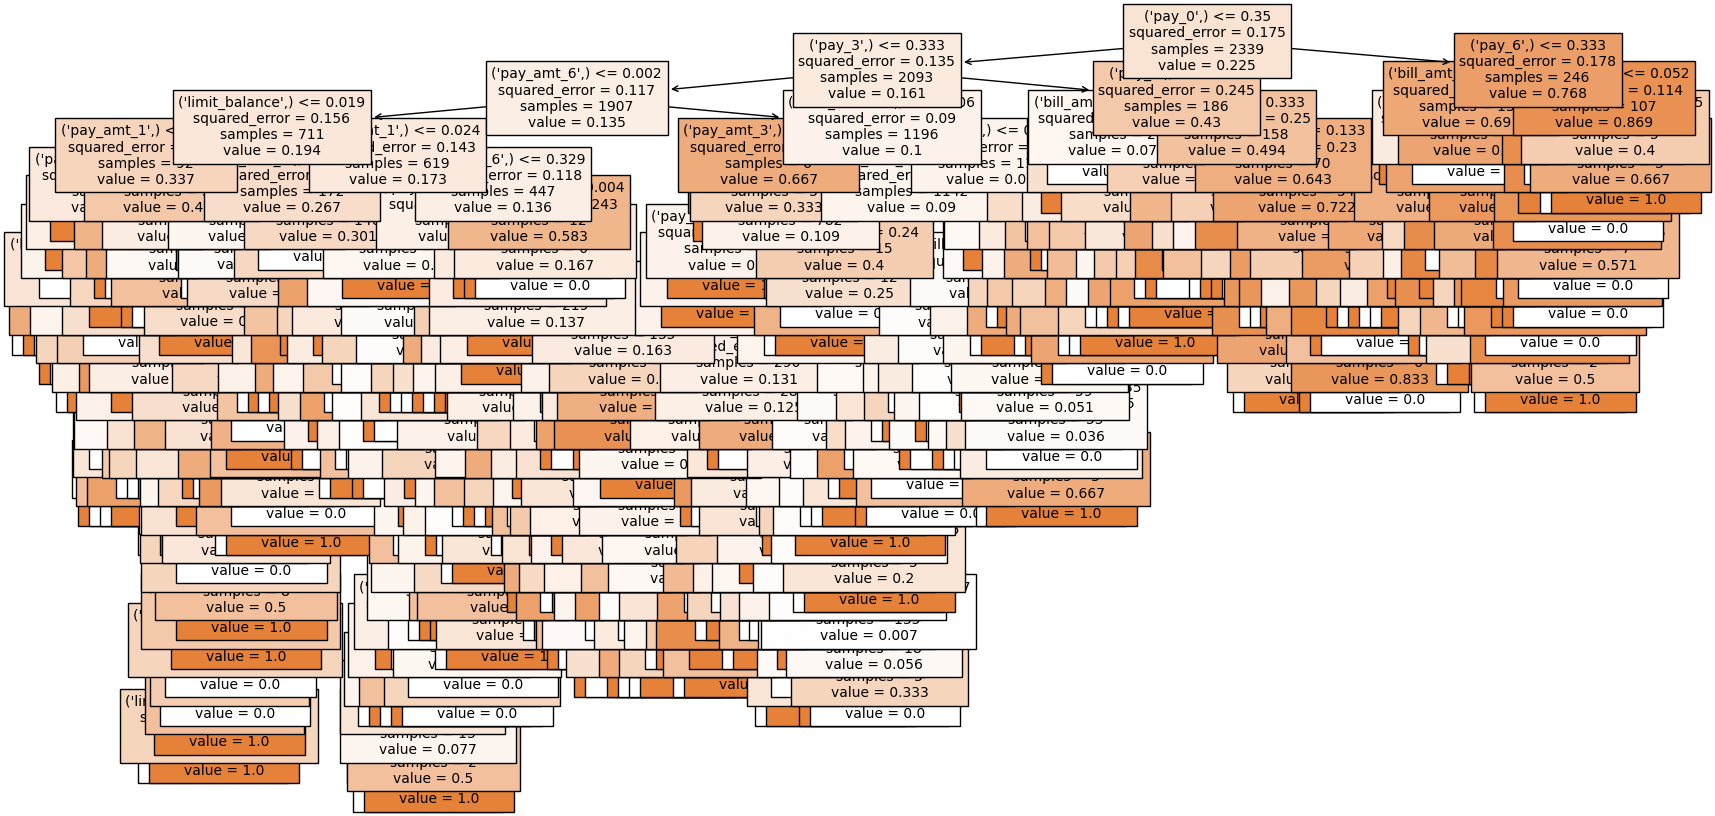

In [310]:
# Visualisasi DT

plt.figure(figsize=(20,10))
X.columns =model_final.columns
tree.plot_tree(mod, feature_names=X.columns, filled=True, fontsize= 10)
plt.show()

In [311]:
# mengubah jadi DataFrame

y_pred_train1=pd.DataFrame(y_pred_train)
X_train1=model_final.reset_index(drop = True)

In [312]:
x_yPred = pd.concat([X_train1, y_pred_train1], axis=1)
x_yPred

,"(limit_balance,)","(sex,)","(education_level,)","(marital_status,)","(age,)","(pay_0,)","(pay_2,)","(pay_3,)","(pay_4,)","(pay_5,)",...,"(bill_amt_4,)","(bill_amt_5,)","(bill_amt_6,)","(pay_amt_1,)","(pay_amt_2,)","(pay_amt_3,)","(pay_amt_4,)","(pay_amt_5,)","(pay_amt_6,)",0
0,0.607595,0.0,0.333333,0.666667,0.437500,0.2,0.222222,0.222222,0.2,0.222222,...,1.000000,0.969470,1.000000,0.032634,0.016299,0.095377,0.094096,0.294150,0.037175,0
1,0.202532,1.0,0.166667,0.666667,0.125000,0.0,0.000000,0.000000,0.0,0.000000,...,0.087082,0.095428,0.147877,0.037942,0.024448,0.000000,0.000000,0.028165,0.000000,1
2,0.253165,0.0,0.333333,1.000000,0.125000,0.2,0.222222,0.222222,0.2,0.222222,...,0.244646,0.272497,0.316019,0.007871,0.003260,0.015100,0.020584,0.057709,0.008359,0
3,0.316456,1.0,0.166667,0.333333,0.187500,0.3,0.000000,0.000000,0.0,0.000000,...,0.087082,0.095428,0.215746,0.000000,0.000000,0.000000,0.000000,0.664595,0.000000,0
4,0.215190,1.0,0.333333,0.333333,0.291667,0.1,0.111111,0.111111,0.1,0.000000,...,0.087082,0.095428,0.145685,0.001196,0.000293,0.000000,0.000000,0.007611,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,0.012658,1.0,0.500000,0.666667,0.208333,0.0,0.000000,0.111111,0.2,0.222222,...,0.122687,0.135178,0.153480,0.000041,0.017465,0.011546,0.003282,0.080946,0.000000,0
2335,0.189873,1.0,0.333333,0.333333,0.437500,0.1,0.222222,0.222222,0.2,0.222222,...,0.155031,0.171368,0.219440,0.003180,0.001544,0.008062,0.007816,0.028091,0.003965,0
2336,0.177215,0.0,0.500000,0.666667,0.479167,0.2,0.222222,0.222222,0.2,0.222222,...,0.261223,0.233676,0.267365,0.010157,0.002481,0.351852,0.014826,0.055153,0.007435,0
2337,0.113924,0.0,0.500000,0.666667,0.312500,0.4,0.222222,0.222222,0.2,0.222222,...,0.170618,0.196106,0.245627,0.008918,0.000838,0.015662,0.036568,0.073832,0.011242,0


In [313]:
x_yPred[0].value_counts()

0    1812
1     527
Name: 0, dtype: int64

In [314]:
# menghilangkan tanda kurung pada kolom

x_yPred.columns = [col[0] if isinstance(col, tuple) else col for col in x_yPred.columns]
x_yPred

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,0
0,0.607595,0.0,0.333333,0.666667,0.437500,0.2,0.222222,0.222222,0.2,0.222222,...,1.000000,0.969470,1.000000,0.032634,0.016299,0.095377,0.094096,0.294150,0.037175,0
1,0.202532,1.0,0.166667,0.666667,0.125000,0.0,0.000000,0.000000,0.0,0.000000,...,0.087082,0.095428,0.147877,0.037942,0.024448,0.000000,0.000000,0.028165,0.000000,1
2,0.253165,0.0,0.333333,1.000000,0.125000,0.2,0.222222,0.222222,0.2,0.222222,...,0.244646,0.272497,0.316019,0.007871,0.003260,0.015100,0.020584,0.057709,0.008359,0
3,0.316456,1.0,0.166667,0.333333,0.187500,0.3,0.000000,0.000000,0.0,0.000000,...,0.087082,0.095428,0.215746,0.000000,0.000000,0.000000,0.000000,0.664595,0.000000,0
4,0.215190,1.0,0.333333,0.333333,0.291667,0.1,0.111111,0.111111,0.1,0.000000,...,0.087082,0.095428,0.145685,0.001196,0.000293,0.000000,0.000000,0.007611,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,0.012658,1.0,0.500000,0.666667,0.208333,0.0,0.000000,0.111111,0.2,0.222222,...,0.122687,0.135178,0.153480,0.000041,0.017465,0.011546,0.003282,0.080946,0.000000,0
2335,0.189873,1.0,0.333333,0.333333,0.437500,0.1,0.222222,0.222222,0.2,0.222222,...,0.155031,0.171368,0.219440,0.003180,0.001544,0.008062,0.007816,0.028091,0.003965,0
2336,0.177215,0.0,0.500000,0.666667,0.479167,0.2,0.222222,0.222222,0.2,0.222222,...,0.261223,0.233676,0.267365,0.010157,0.002481,0.351852,0.014826,0.055153,0.007435,0
2337,0.113924,0.0,0.500000,0.666667,0.312500,0.4,0.222222,0.222222,0.2,0.222222,...,0.170618,0.196106,0.245627,0.008918,0.000838,0.015662,0.036568,0.073832,0.011242,0


In [315]:
print('MAE train = ', mean_absolute_error(y_train_drop, y_pred_train))
print('MAE test = ', mean_absolute_error(y_test_drop, y_pred_test))

print('MSE train = ', mean_squared_error(y_train_drop, y_pred_train))
print('MSE test = ', mean_squared_error(y_test_drop, y_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train_drop, y_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test_drop, y_pred_test)))

print('r2score train = ', r2_score(y_train_drop, y_pred_train))
print('r2score test = ', r2_score(y_test_drop, y_pred_test))

MAE train =  0.0
MAE test =  0.26475548060708265
MSE train =  0.0
MSE test =  0.26475548060708265
RMSE train =  0.0
RMSE test =  0.5145439540088705
r2score train =  1.0
r2score test =  -0.8035140056565031


1. Performa pada data latih: Model Decision Tree mampu memprediksi data latih dengan sangat baik, menghasilkan MAE dan MSE yang rendah, bahkan mencapai nilai 0.0. Hal ini menunjukkan bahwa model secara sempurna dapat mempelajari pola yang ada dalam data latih.

2. Performa pada data uji: Meskipun performa pada data latih sangat baik, model Decision Tree mengalami masalah dalam generalisasi pada data uji. Terlihat dari nilai MAE, MSE, RMSE, dan R2 Score yang lebih tinggi pada data uji. Ini bisa menandakan adanya overfitting, di mana model terlalu "terbiasa" dengan data latih sehingga tidak mampu memprediksi dengan baik pada data baru.

### Decision Tree Classifier

In [316]:
y_pred_train1 = DT_model.predict(X_train_final)
y_pred_test1 = DT_model.predict(X_test_final)

In [317]:
print('accuracy score train : ',accuracy_score(y_train_drop,y_pred_train))
print('accuracy score test : ',accuracy_score(y_test_drop,y_pred_test))

accuracy score train :  1.0
accuracy score test :  0.7352445193929174


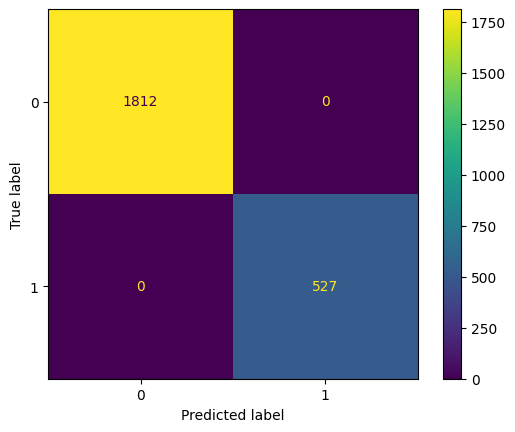

In [318]:
cm = confusion_matrix(y_train_drop, y_pred_train, labels=DT_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=DT_model.classes_)

disp.plot()
plt.show()

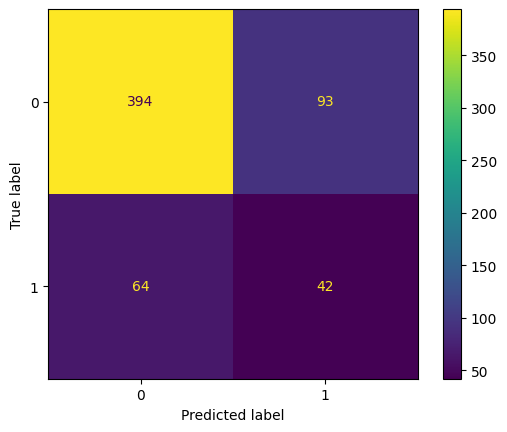

In [319]:
cm = confusion_matrix(y_test_drop, y_pred_test, labels=DT_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=DT_model.classes_)

disp.plot()
plt.show()

In [320]:
print(classification_report(y_test_drop,y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       487
           1       0.31      0.40      0.35       106

    accuracy                           0.74       593
   macro avg       0.59      0.60      0.59       593
weighted avg       0.76      0.74      0.75       593



In [321]:
# Print hasil evaluasi data latih

print(classification_report(y_train_drop,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1812
           1       1.00      1.00      1.00       527

    accuracy                           1.00      2339
   macro avg       1.00      1.00      1.00      2339
weighted avg       1.00      1.00      1.00      2339



Dari hasil di atas, dapat dilihat bahwa model yang telah dibuat cenderung overfitting karena terdapat perbedaan yang signifikan antara performa pada data train dan data test. 

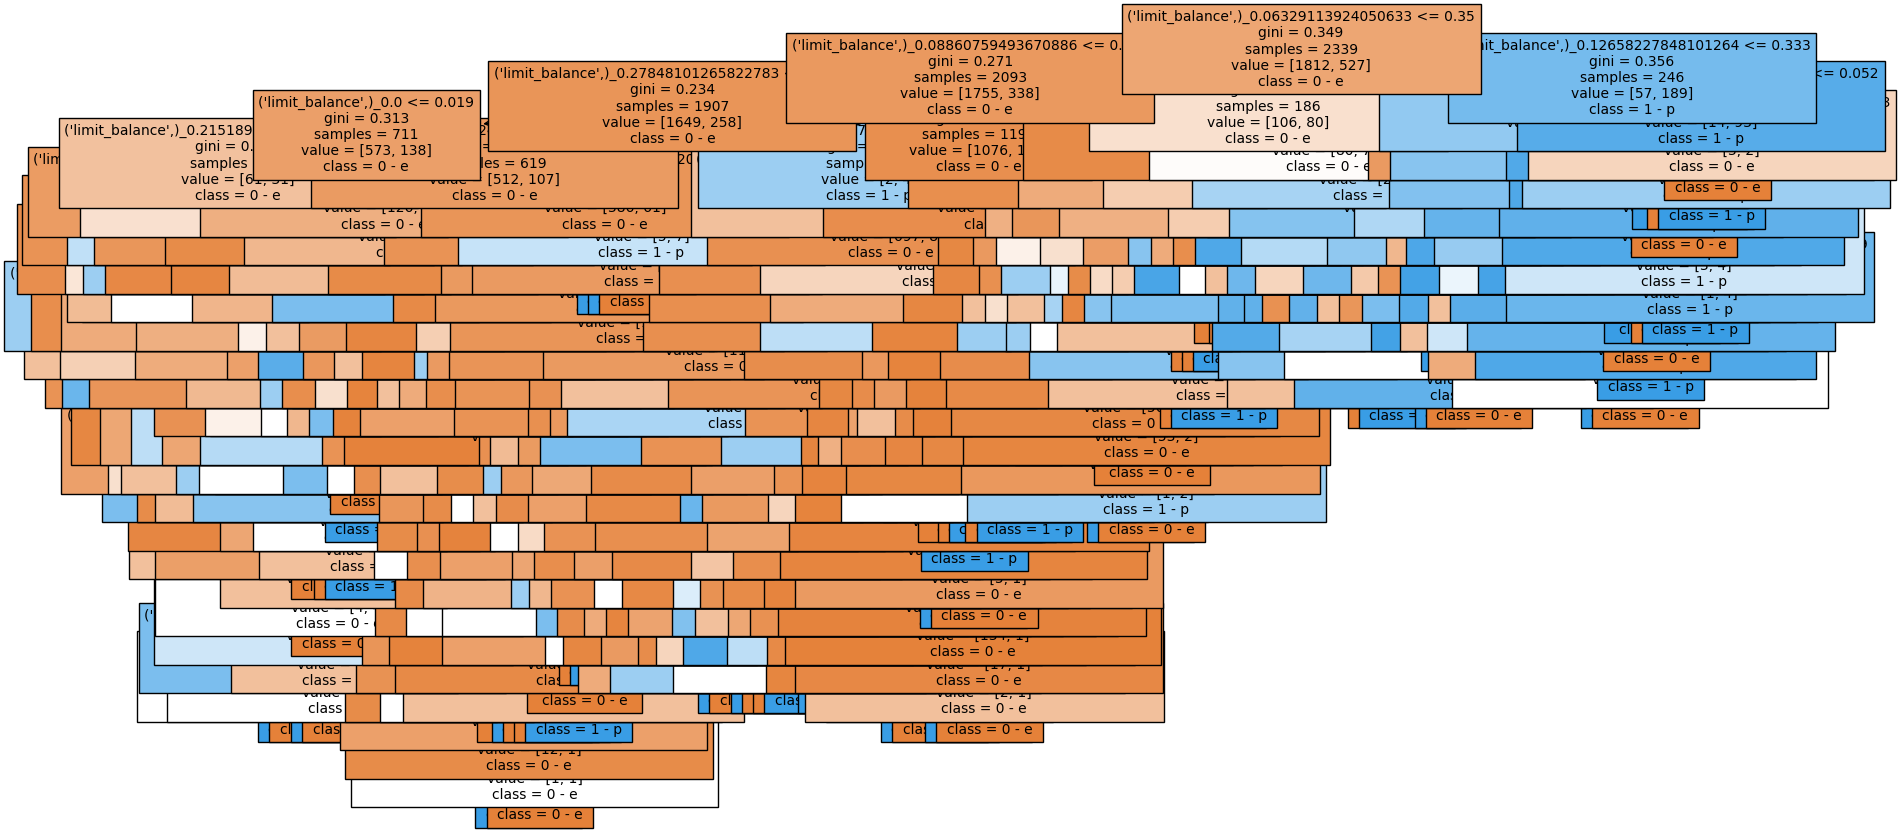

In [322]:
# Visualisasi DTC

plt.figure(figsize=(20,10))
tree.plot_tree(DT_model, feature_names=enc_name_columns,class_names=['0 - e', '1 - p'], filled=True, fontsize= 10)
plt.show()

## Random Forest

In [323]:
# Melakukan prediksi pada data uji
y_pred = rf_model.predict(X_test_final)

# Menghitung skor akurasi
accuracy = accuracy_score(y_test_drop, y_pred)
print("Accuracy:", accuracy)

# Menampilkan laporan klasifikasi
classification_report = classification_report(y_test_drop, y_pred)
print("Classification Report:")
print(classification_report)

Accuracy: 0.8347386172006745
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       487
           1       0.56      0.37      0.44       106

    accuracy                           0.83       593
   macro avg       0.71      0.65      0.67       593
weighted avg       0.82      0.83      0.82       593



Model Random Forest memiliki akurasi yang baik dengan skor 0.83. Namun, kinerjanya lebih baik dalam mengklasifikasikan kelas nasabah tepat waktu (kelas 0) dengan precision, recall, dan f1-score yang tinggi, sementara kinerja dalam mengklasifikasikan kelas nasabah gagal bayar (kelas 1) masih dapat ditingkatkan. Untuk meningkatkan kinerja dalam mengklasifikasikan kelas 1 nasabah gagal bayar.

### Soft Voting

Karena kita memanfaatkan informasi lebih banyak dari setiap model basis. Dengan mengambil rata-rata skor probabilitas atau kepercayaan. maka kita akan menggunakan soft voting untuk memprediksi kelas dengan skor probabilitas tertinggi atau rata-rata tertinggi

In [324]:
svm_clf = SVC(gamma="scale", probability=True, random_state=42)
voting_clf = VotingClassifier(
    estimators=[('linreg', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')

In [325]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train_final, y_train_drop)
    y_pred = clf.predict(X_test_final)
    print(clf.__class__.__name__, accuracy_score(y_test_drop, y_pred))

LogisticRegression 0.8381112984822934
RandomForestClassifier 0.8347386172006745
SVC 0.8263069139966274
VotingClassifier 0.8347386172006745


mari kita gunakan data baru untuk menguji model

In [326]:
new = [[0.316456, 1.0, 0.166667, 1.000000, 0.354167, 0.4, 0.222222, 0.111111, 0.2, 0.222222, 0.92323, 0.19258, 0.04457, 1.0, 0.9694, 1.0, 0.0, 0.0, 0.0, 0.09, 0.294150, 0.0, 0.0]]

In [327]:
# kita tampilkan hasilnya 

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train_final, y_train_drop)
    y_pred_prob = clf.predict_proba(new)
    y_pred = clf.predict(new)
    print(clf.__class__.__name__, '_prob: ', y_pred_prob)
    print(clf.__class__.__name__, ': ', y_pred)
    print('-'*50)

LogisticRegression _prob:  [[0.61504637 0.38495363]]
LogisticRegression :  [0]
--------------------------------------------------
RandomForestClassifier _prob:  [[0.36 0.64]]
RandomForestClassifier :  [1]
--------------------------------------------------
SVC _prob:  [[0.65600472 0.34399528]]
SVC :  [0]
--------------------------------------------------
VotingClassifier _prob:  [[0.5436837 0.4563163]]
VotingClassifier :  [0]
--------------------------------------------------


1. Logistic Regression:
* Probabilitas prediksi kelas 0: 0.61504637
* Probabilitas prediksi kelas 1: 0.38495363
* Prediksi akhir: 0

2. Random Forest Classifier:
* Probabilitas prediksi kelas 0: 0.36
* Probabilitas prediksi kelas 1: 0.64
* Prediksi akhir: 1

3. SVC (Support Vector Classifier):
* Probabilitas prediksi kelas 0: 0.65600472
* Probabilitas prediksi kelas 1: 0.34399528
* Prediksi akhir: 0

4. Voting Classifier:
* Probabilitas prediksi kelas 0: 0.5436837
* Probabilitas prediksi kelas 1: 0.4563163
* Prediksi akhir: 0

---

Dalam kasus ini, Logistic Regression dan Voting Classifier memiliki prediksi akhir yang sama dengan nilai 0, sedangkan Random Forest Classifier dan SVC memiliki prediksi akhir yang berbeda dengan nilai 1. dapa disimpulkan dari hasil ini adalah bahwa ada kecenderungan untuk memprediksi nilai 0 (nasabah tepat waktu) dalam kasus ini, terutama dari Logistic Regression dan Voting Classifier.

## KNN

In [335]:
# menampilkan nilai KNN score

train_acc= knn.score(X_train_final, y_train_drop)
test_acc= knn.score(X_test_final, y_test_drop)
print(train_acc)
print(test_acc)

0.8696023941855494
0.7959527824620574


Dapat disimpulkan bahwa model KNN memiliki kinerja yang baik dalam melakukan prediksi pada dataset yang digunakan. Terdapat sedikit perbedaan antara training accuracy dan test accuracy, namun perbedaan tersebut tidak signifikan, yang menunjukkan bahwa model tidak mengalami overfitting atau underfitting.

---

Dalam konteks ini, model KNN mampu mengklasifikasikan data dengan tingkat akurasi yang baik. Namun, perlu diingat bahwa evaluasi model tidak hanya berdasarkan pada akurasi saja, melainkan juga melihat metrik lain seperti precision, recall, f1-score, atau confusion matrix untuk memahami kinerja model lebih rinci tergantung pada tujuan dan karakteristik dari dataset yang digunakan

In [341]:
# Menampilkan laporan klasifikasi

knn_train_p = best_model.predict(X_train_final)
knn_test_p = best_model.predict(X_test_final)

print("Evaluation: KNN")
print('Training score: {:.4f}'.format(best_model.score(X_train_final, y_train_drop)))
print('Test score: {:.4f}'.format(best_model.score(X_test_final, y_test_drop)))

report = classification_report(y_test_drop, knn_test_p)
print(report)

Evaluation: KNN
Training score: 0.8277
Test score: 0.8314
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       487
           1       0.57      0.25      0.34       106

    accuracy                           0.83       593
   macro avg       0.71      0.60      0.62       593
weighted avg       0.80      0.83      0.80       593



 Model KNN memiliki performa yang baik dalam memprediksi kelas nasabah tepat waktu (kelas 0), dengan tingkat precision, recall, dan F1-score yang tinggi. Namun, model memiliki kinerja yang lebih rendah dalam memprediksi kelas nasabah gagal bayar (kelas 1)

### Tuning KNN

In [342]:
n_neighbors = list(range(1,15))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p)

#Create new KNN object
knn_2 = KNeighborsClassifier()

#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

#Fit the model
best_model = clf.fit(X_train_final,y_train_drop)

#Print The value of best Hyperparameters
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best p: 1
Best n_neighbors: 13


dapat disimpulkan bahwa menggunakan p=1 (Manhattan distance) dan n_neighbors=13 memberikan kinerja terbaik berdasarkan evaluasi yang dilakukan dengan validasi silang. karena nilai dari p dan n_neighbors hampir mendekati 1 dan 15

## Naive Bayes

In [343]:
# Evaluation

y_pred = nb.predict(X_test_final)
print(classification_report(y_pred, y_test_drop))

              precision    recall  f1-score   support

           0       0.35      0.91      0.51       190
           1       0.83      0.22      0.35       403

    accuracy                           0.44       593
   macro avg       0.59      0.56      0.43       593
weighted avg       0.68      0.44      0.40       593



Dapat disimpulkan bahwa model Naive Bayes memiliki kinerja yang kurang memuaskan dalam memprediksi nasabah yang gagal bayar (kelas 1). Hal ini ditunjukkan oleh precision, recall, dan f1-score yang rendah untuk kelas 1.

## Bagging

In [344]:
# Melihat hasil evaluasi berdasarkan nilai accuracy dari Bagging

print(accuracy_score(y_test_drop, y_pred))

0.43844856661045534


Tingkat akurasi yang relatif tinggi pada data uji menunjukkan bahwa model Bagging mampu melakukan generalisasi dengan baik pada data baru yang tidak digunakan dalam proses pelatihan. Hal ini menunjukkan bahwa model tidak terlalu terpengaruh oleh data pelatihan dan mampu mengenali pola-pola yang umum dalam data.

mari kita bandingkan dengan model yang lain

In [345]:
# Model Decision Tree

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_final, y_train_drop)
y_pred_tree = tree_clf.predict(X_test_final)
print(accuracy_score(y_test_drop, y_pred_tree))

0.7352445193929174


In [346]:
# Model Random Forest

rnd_clf = RandomForestClassifier(n_estimators=500,max_features='sqrt', max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train_final, y_train_drop)

y_pred_rf = rnd_clf.predict(X_test_final)
accuracy_score(y_test_drop, y_pred_rf)

0.8414839797639123

Ternyata nilai accuracy dari model bagging tidak jauh berbeda dari nilai model lainnya

## Cros Validation

In [347]:
# Inisialisasi model-model
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Bagging': BaggingClassifier()
}


In [348]:
# Melakukan cross-validation dan mengambil hasil performansi
scoring = ['accuracy', 'precision', 'recall', 'f1']
results = []
for model_name, model in models.items():
    cv_results = cross_validate(model, X_train_final, y_train_drop, cv=5, scoring=scoring, return_train_score=False)
    result = {
        'Model': model_name,
        'Accuracy Mean': np.mean(cv_results['test_accuracy']),
        'Accuracy Std': np.std(cv_results['test_accuracy']),
        'Precision Mean': np.mean(cv_results['test_precision']),
        'Precision Std': np.std(cv_results['test_precision']),
        'Recall Mean': np.mean(cv_results['test_recall']),
        'Recall Std': np.std(cv_results['test_recall']),
        'F1-score Mean': np.mean(cv_results['test_f1']),
        'F1-score Std': np.std(cv_results['test_f1'])
    }
    results.append(result)

In [349]:
# Membuat DataFrame dari hasil
df_results1 = pd.DataFrame(results)
df_results1.set_index('Model', inplace=True)

# Menampilkan DataFrame hasil
print(df_results1)

                     Accuracy Mean  Accuracy Std  Precision Mean  \
Model                                                              
Logistic Regression       0.814018      0.010895        0.729097   
SVM                       0.822996      0.012117        0.744730   
Decision Tree             0.725516      0.015999        0.401962   
Random Forest             0.827698      0.019528        0.696720   
KNN                       0.805462      0.018402        0.625908   
Naive Bayes               0.481406      0.028068        0.281146   
Bagging                   0.818285      0.024334        0.666975   

                     Precision Std  Recall Mean  Recall Std  F1-score Mean  \
Model                                                                        
Logistic Regression       0.058347     0.276891    0.041162       0.400220   
SVM                       0.048501     0.324313    0.051032       0.450341   
Decision Tree             0.031544     0.442066    0.028241       0.420704 

Dan ternyata didapatkan hasil cross validation dengan nilai terbaik berada pada model Random Forest. mari kita lakukan pengecekan menggunakan hyper parameteer tuning pada random forest

## Pengecekan

In [350]:
# Definisikan model RandomForestClassifier
rf = RandomForestClassifier(max_features='sqrt')

# Definisikan grid parameter yang akan dituning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
}

# Inisialisasi objek GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Melakukan hyperparameter tuning
grid_search.fit(X_train_final, y_train_drop)

# Menampilkan hasil tuning
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'max_depth': 10, 'n_estimators': 300}
Best score: 0.833679240103223


Perbedaan antara hasil evaluasi sebelum dan setelah tuning menunjukkan bahwa penyetelan hyperparameter membantu model untuk lebih cocok (fit) dengan data, sehingga meningkatkan kemampuannya dalam melakukan prediksi yang lebih akurat

# Model Saving

In [351]:
with open('rnd_clf.pkl', 'wb') as file_1:
  pickle.dump(rnd_clf, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  pickle.dump(scaler, file_2)

with open('list_num_cols.txt', 'w') as file_3:
  json.dump(num_columns, file_3)

with open('list_cat_cols.txt','w') as file_4: 
  json.dump(cat_columns, file_4)

In [352]:
X_train

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
518,490000,1,2,2,42,0,0,0,0,0,...,477884,488808,427064,436172,16100,20000,19000,16000,16000,15000
2779,170000,2,1,2,27,-2,-2,-2,-2,-2,...,30000,0,0,1532,18719,30000,0,0,1532,0
573,210000,1,2,3,27,0,0,0,0,0,...,84014,84365,86517,87296,3883,4000,3008,3500,3139,3373
2811,260000,2,1,1,30,1,-2,-2,-2,-2,...,0,0,0,36150,0,0,0,0,36150,0
2948,180000,2,2,1,35,-1,-1,-1,-1,-2,...,360,0,0,414,590,360,0,0,414,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,20000,2,3,2,31,-2,-2,-1,0,0,...,18354,19064,19422,4390,20,21431,2300,558,4403,0
1095,160000,2,2,1,42,-1,0,0,0,0,...,36512,36382,37105,38034,1569,1895,1606,1329,1528,1600
1130,150000,1,3,2,44,0,0,0,0,0,...,34409,93241,67549,62479,5011,3045,70092,2521,3000,3000
1294,100000,1,3,2,36,2,0,0,0,0,...,42636,44728,49192,51391,4400,1028,3120,6218,4016,4536


# Model Inference

## Load Model

In [353]:
# Load the scaler model

with open('rnd_clf.pkl', 'wb') as file_1:
    pickle.dump(rnd_clf, file_1)

with open('model_scaler.pkl', 'rb') as file_2:
    model_scaler = pickle.load(file_2)

# Load the list of numerical columns
with open('list_num_cols.txt', 'r') as file_3:
    list_num_cols = json.load(file_3)

# Load the list of categorical columns
with open('list_cat_cols.txt', 'r') as file_4:
    list_cat_cols = json.load(file_4)

## Buat data baru

In [354]:
data_inf = {
    'limit_balance': 500000,
    'sex': 1,
    'education_level': 2,
    'marital_status': 1,
    'age': 24,
    'pay_0': -1,
    'pay_2': 0,
    'pay_3': 0,
    'pay_4': -2,
    'pay_5': -2,
    'pay_6': -1,
    'bill_amt_1': 0,
    'bill_amt_2': 18354,
    'bill_amt_3': 0,
    'bill_amt_4': 0,
    'bill_amt_5': 19422,
    'bill_amt_6': 87296,
    'pay_amt_1': 8000,
    'pay_amt_2': 1605,
    'pay_amt_3': 1329,
    'pay_amt_4': 0,
    'pay_amt_5': 1000,
    'pay_amt_6': 3000,

}

data_inf = pd.DataFrame([data_inf])
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,500000,1,2,1,24,-1,0,0,-2,-2,...,0,0,19422,87296,8000,1605,1329,0,1000,3000


In [355]:
# Split between Numerical Columns and Categorical Columns

data_inf_num = data_inf[num_columns]
data_inf_cat = data_inf[cat_columns]
data_inf_num

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,500000,1,2,1,24,-1,0,0,-2,-2,...,0,0,19422,87296,8000,1605,1329,0,1000,3000


In [356]:
# Feature Scaling and Feature Encoding

data_inf_num_scaled = model_scaler.transform(data_inf_num)
data_inf_final = np.concatenate([data_inf_num_scaled], axis=1)

## Prediksi dari data baru

In [357]:
# Prediksi menggunakan random forest

y_pred_inf = rnd_clf.predict(data_inf_final)
y_pred_inf

array([0])

# Kesimpulan

## Conceptual Problem

### Pertanyaan

1. Apa yang dimaksud dengan criterion pada Decision Tree ? Jelaskan criterion yang kalian pakai dalam kasus ini !

2. Jelaskan apa yang dimaksud dengan pruning pada Tree-based model (alasan, definisi, jenis, dll) !

3. Bagaimana cara memilih K yang optimal pada KNN ?

4. Jelaskan apa yang dimaksud dengan Cross Validation !

5. Apa yang dimaksud dengan metrics-metrics berikut : Accuracy, Precision, Recall, F1 Score, dan kapan waktu yang tepat untuk menggunakannya ?

### Jawaban

1. Criterion dalam model Decision Tree adalah metode yang digunakan untuk mengukur kualitas pemisahan (split) pada setiap langkah pembentukan pohon keputusan. dikarena datasetnya inbalence maka saya menggunakan criterion gini impurity. Gini impurity cenderung lebih cocok untuk data yang tidak seimbang karena fokusnya pada pemisahan kelas mayoritas dengan kecilnya kontribusi kelas minoritas. Ini dapat menghasilkan pohon keputusan yang lebih condong pada kelas mayoritas dan mungkin mengabaikan kelas minoritas dalam beberapa kasus.

2. Pruning atau disebut juga pemangkasan pada model Decision Tress adalah proses mengurangi ukuran pohon keputusan dengan menghapus atau membatasi beberapa bagian dari pohon yang tidak signifikan atau cenderung overfitting.
* Tujuan pruning adalah untuk meningkatkan kemampuan generalisasi dan mencegah pohon keputusan menjadi terlalu kompleks dan kaku pada data pelatihan. Pruning
* Jenis pruning ada 2 yaitu Pre_pruning dan Post-Pruning. Pruning dilakukan selama pembentukan pohon keputusan, di mana penghentian pertumbuhan pohon dihentikan sebelum mencapai tingkat maksimum kedalaman atau jumlah simpul. dan Post-pruning dilakukan setelah pohon keputusan selesai dibentuk, di mana simpul atau sub-pohon yang tidak signifikan dihapus dari pohon.
* Keuntungan Pruning : Mencegah Overvitting, Meningkatkan Generalisasi, meningkatkan interpretabilitas agar lebih mudah dipahami

3. untuk memilih nilai K yang optimal dapat melakukan cara-cara berikut: Metode Uji Coba (Trial dan Eror), Cross-Validation, Grid Search, dan Tuning

4. Cross-validation adalah metode yang digunakan dalam pembelajaran mesin untuk mengevaluasi kinerja model pada data yang terbatas. Tujuan utama dari cross-validation adalah untuk menguji sejauh mana model yang dilatih dapat menggeneralisasi dengan baik ke data yang belum pernah dilihat sebelumnya.

5. penjelasan metrik evaluasi:

* Accuracy (Akurasi): Akurasi adalah metrik evaluasi yang mengukur sejauh mana model dapat dengan benar mengklasifikasikan data. Ini adalah rasio antara jumlah prediksi yang benar dengan jumlah total prediksi. penggunaanya ketika kelas target memiliki distribusi yang seimbang dan kesalahan klasifikasi untuk kedua kelas dianggap memiliki bobot yang sama.
* Precision (Presisi): Presisi mengukur sejauh mana prediksi positif yang diklasifikasikan oleh model adalah benar. Ini adalah rasio antara jumlah prediksi positif benar dengan jumlah total prediksi positif yang dilakukan oleh model. Presisi berguna ketika fokus utama adalah menghindari kesalahan false positive (mengklasifikasikan negatif sebagai positif).
* Recall (Recall, Sensitivity, True Positive Rate): Recall mengukur sejauh mana model dapat mengidentifikasi secara benar semua instance positif yang ada dalam dataset. Ini adalah rasio antara jumlah prediksi positif benar dengan jumlah total instance positif dalam dataset. Recall berguna ketika fokus utama adalah menghindari kesalahan false negative (mengklasifikasikan positif sebagai negatif).
* F1 Score: F1 Score adalah penggabungan antara presisi dan recall menjadi satu angka yang menyajikan keseimbangan antara keduanya. F1 Score diperoleh dengan mengambil nilai rata-rata harmonik dari presisi dan recall. F1 Score berguna ketika ingin mencari keseimbangan antara presisi dan recall.



## Kesimpulan Explorasi Data dan Pemodelan

1. dataset CC_default memiliki data yang tidak seimbang dalam mengkalisifikasikan kelas default_payment_next_month dengan proporsi kelas nasabah tepat waktu 78% lebih banyak dari kelas nasabah gagal bayar 21%

2. Dikarenakan datanya inbalence maka akan menghasilkan pemodelan dengan evaluasi rata-rata memiliki akurasi score yang tinggi diatas 70% dalam memprediksi nasabah tepat waktu (kelas 0) dibanding memprediksi nasabah gagal bayar (kelas 1).

3. Peniting untuk diingat bahwasannya pendeteksian untuk jenis nasabah tepat waktu (kelas 0) lebih penting dibandingkan memprediksi nasabah gagal bayar. hal ini dikarenakan memprediksi nasabah tepat waktu akan memberikan keuntungan bagi perusahaan bidang keuangan dalam mendapatkan net interest margin atau bunga dari pinjaman debitur. dibantingkan memprediksi nasabah gagal bayar (kelas 0) yang justru akan meningkatkan rasio Non Performing Loan atau rasion gagal bayar perusahaan keuangan yang tentunya akan merugikan perusahaan dalam aliran arus kasnya.

4. Setelah dilakukan pemodelan pada setiap algoritma pemodelan. didapatkan nilai cross validation tertinggi berada pada model random Forest classifier dengan nilai Accuracy 82.7 % dan setelah dicoba melakukan tuning menggunakan Grid Search CV menghasilkan nilai best score 83% meningkat dari nilai sebelumnya.

5. dan setelah dilakukan model inference dengan menggunakan data baru berhasil menghasilkan nilai klasifikasi dalam penentuan nasabah tepat waktu (kelas 0) atau nasabah gagal bayar (kelas 1)